In [2]:
import gzip, json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

data = []

for review in parse("Software.json.gz"):
  data.append(review)


In [4]:
vote = []
for d in data:
    if 'vote' in d:
        vote.append(int(d['vote'].replace(',', '')))
    else:
        vote.append(0)
vote = np.array(vote)

In [5]:
from datetime import datetime

date =[]
for d in data:
    date.append(datetime.strptime(d['reviewTime'], '%m %d, %Y'))
min_date = np.min(date)
days = [(d - min_date).days for d in date]

In [6]:
sales = np.zeros(np.max(days)+1)
votes = np.zeros(np.max(days)+1)
for d, v in zip(days, vote):
    sales[d] = sales[d] + 1
    votes[d] = votes[d] + v
day_index = np.array(range(np.max(days)+1))

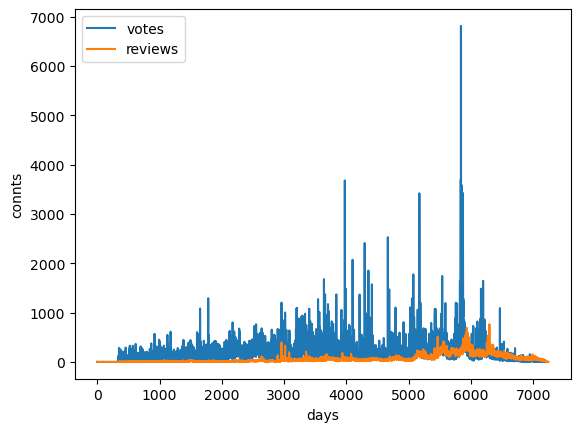

In [7]:
plt.plot(day_index, votes, label="votes")
plt.plot(day_index, sales, label="reviews")
plt.xlabel("days")
plt.ylabel("connts")
plt.legend()
plt.show()

/tmp/ipykernel_591/3765231740.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(day_index, votes/sales, c='green')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


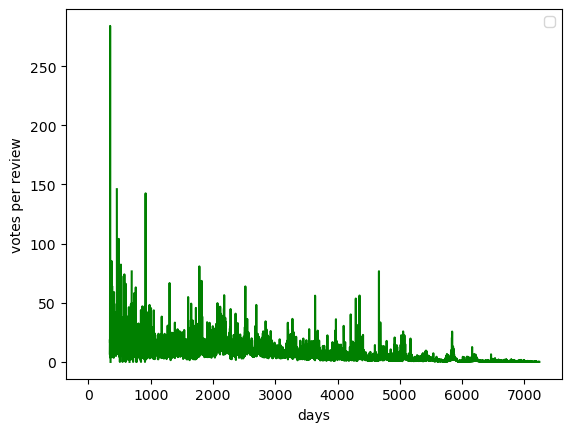

In [8]:
plt.plot(day_index, votes/sales, c='green')
plt.xlabel("days")
plt.ylabel("votes per review")
plt.legend()
plt.show()

/tmp/ipykernel_591/3238012267.py:2: RuntimeWarning: divide by zero encountered in log10
  for d, v in zip(date, np.log10(vote)):


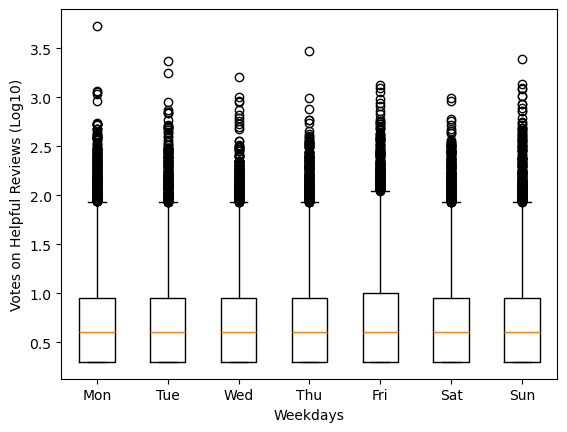

In [9]:
weekdays = [[] for _ in range(7)]
for d, v in zip(date, np.log10(vote)):
    if v > 0:
        weekdays[d.weekday()].append(v)

plt.boxplot(weekdays)
plt.xlabel("Weekdays")
plt.ylabel("Votes on Helpful Reviews (Log10)")
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Optional: Setting custom labels for x-axis
plt.show()

/tmp/ipykernel_591/1119765542.py:2: RuntimeWarning: divide by zero encountered in log10
  for d, v in zip(date, np.log10(vote)):


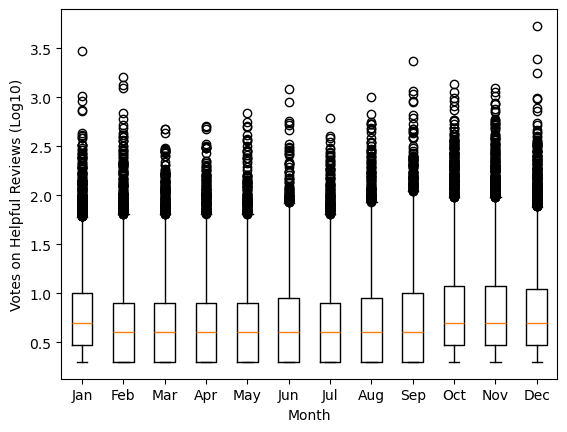

In [10]:
month = [[] for _ in range(12)]
for d, v in zip(date, np.log10(vote)):
    if v > 0:
        month[d.month-1].append(v)

plt.boxplot(month)
plt.xlabel("Month")
plt.ylabel("Votes on Helpful Reviews (Log10)")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Optional: Setting custom labels for x-axis
plt.show()

In [11]:
from collections import defaultdict

U = set()
I = set()
U_i = defaultdict(set)
I_u = defaultdict(set)
R = dict()

for d in data:
    uid = d['reviewerID']
    iid = d['asin']
    U.add(uid)
    I.add(iid)
    U_i[iid].add(uid)
    I_u[uid].add(iid)
    R[(uid, iid)] = d

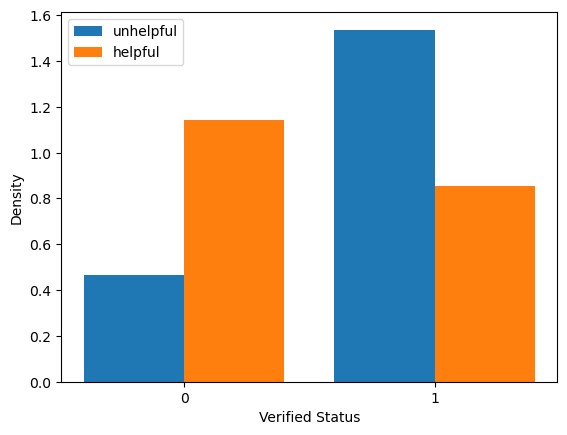

In [20]:
verified_helpful = [int(d['verified']) for d in data if 'vote' in d]
verified_unhelpful = [int(d['verified']) for d in data if 'vote' not in d]
plt.hist([verified_unhelpful, verified_helpful], label=['unhelpful', 'helpful'], bins=[0, 0.5, 1.0], density=True)

# Optional: Adding labels and title for clarity
plt.xlabel('Verified Status')
plt.ylabel('Density')
plt.xticks([0.25, 0.75], ['0', '1'])  # Setting custom x-axis labels at the center of bins
plt.legend(loc='upper left')
plt.show()

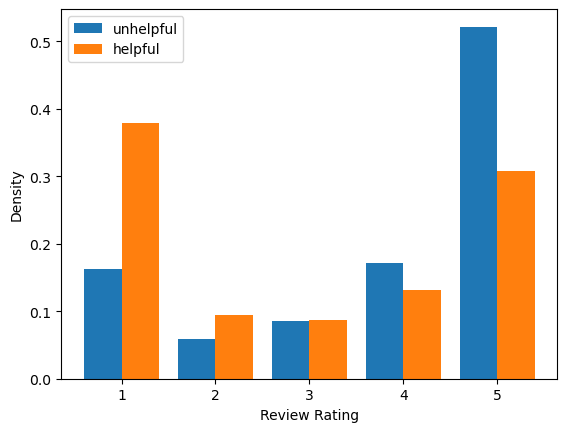

In [13]:
rating_helpful = np.array([int(d['overall']) for d in data if 'vote' in d])
rating_unhelpful = np.array([int(d['overall']) for d in data if 'vote' not in d])
plt.hist([rating_unhelpful, rating_helpful], label=['unhelpful', 'helpful'], bins=np.arange(0.5, 6), density=True)

# Set x-axis to show integers from 1 to 5
plt.xticks(range(1, 6), ['1', '2', '3', '4','5'])
plt.xlabel('Review Rating')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

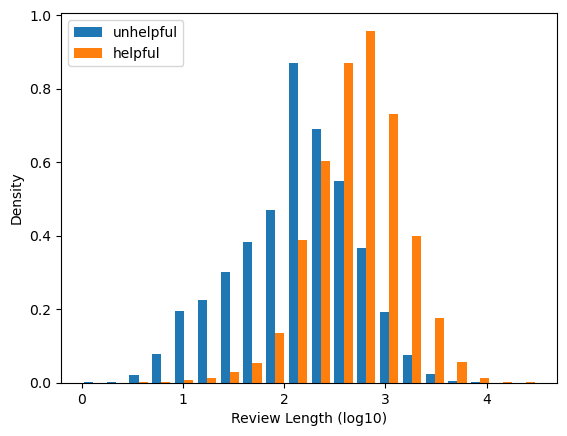

In [14]:
text_len_helpful = np.array([len(d['reviewText'])+1 if 'reviewText' in d else 1 for d in data if 'vote' in d])
text_len_unhelpful = np.array([len(d['reviewText'])+1 if 'reviewText' in d else 1 for d in data if 'vote' not in d])
plt.hist([np.log10(text_len_unhelpful), np.log10(text_len_helpful)], label=['unhelpful', 'helpful'], density=True, bins=20)

plt.xlabel('Review Length (log10)')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

3.0 8994
1.0 72


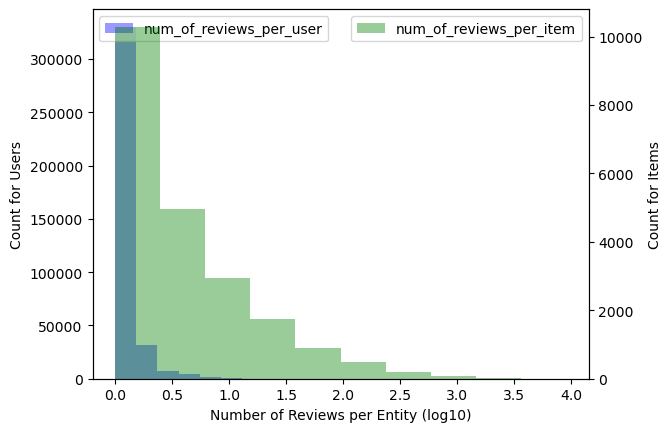

In [15]:
num_of_reviews_per_item = np.array([len(U_i[i]) for i in I])
num_of_reviews_per_user = np.array([len(I_u[u]) for u in U])
print(np.median(num_of_reviews_per_item), np.max(num_of_reviews_per_item))
print(np.median(num_of_reviews_per_user), np.max(num_of_reviews_per_user))

# Create a figure and first axis
fig, ax1 = plt.subplots()

# Plot histogram on the first axis
ax1.hist(np.log10(num_of_reviews_per_user), bins=10, alpha=0.4, label='num_of_reviews_per_user', color='blue')
ax1.set_xlabel("Number of Reviews per Entity (log10)")
ax1.set_ylabel("Count for Users")
ax1.tick_params('y')
ax1.legend(loc='upper left')

# Create a second axis
ax2 = ax1.twinx()

# Plot line on the second axis\
ax2.hist(np.log10(num_of_reviews_per_item), bins=10, alpha=0.4, label='num_of_reviews_per_item', color='green')
ax2.set_ylabel("Count for Items")
ax2.tick_params('y')
ax2.legend(loc='upper right')

plt.show()

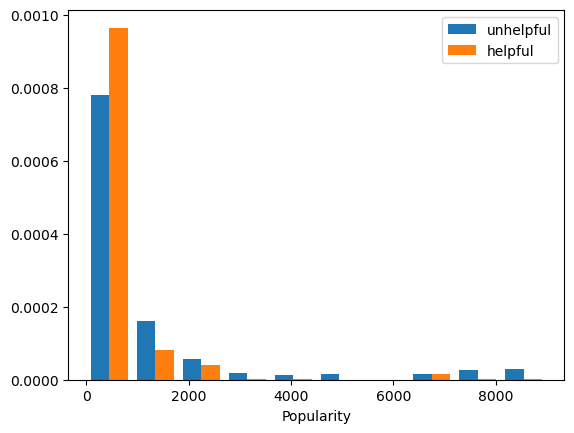

In [16]:
pop_helpful = [len(U_i[d['asin']]) for d in data if 'vote' in d]
pop_unhelpful = [len(U_i[d['asin']]) for d in data if 'vote' not in d]
plt.hist([pop_unhelpful, pop_helpful], label=['unhelpful', 'helpful'], density=True)
plt.xlabel("Popularity")
plt.legend()
plt.show()

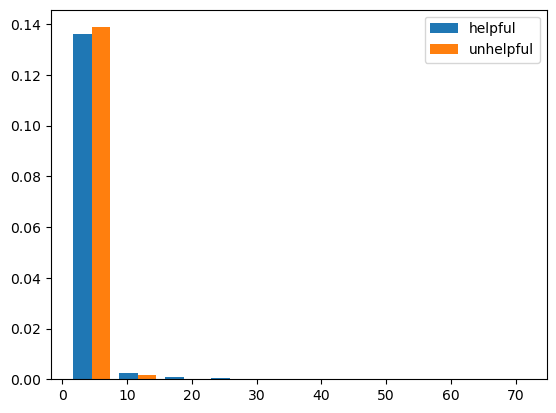

In [17]:
pop_helpful = [len(I_u[d['reviewerID']]) for d in data if 'vote' in d]
pop_unhelpful = [len(I_u[d['reviewerID']]) for d in data if 'vote' not in d]
plt.hist([pop_helpful, pop_unhelpful], label=['helpful', 'unhelpful'], density=True)
plt.legend()
plt.show()

5365 2


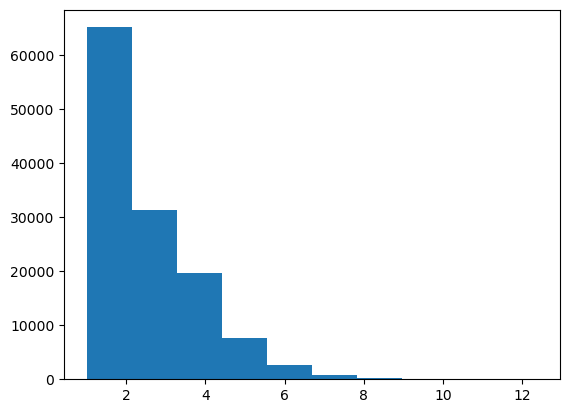

In [18]:
print(np.max(vote),np.min(vote[vote>0]))
# Plotting the histogram
plt.hist(np.log2(vote[vote>0]), bins=10)
plt.show()